Note: This code contains some repetitions (such as multiple library imports) due to being developed in stages. Rather than restarting and re-running the entire process, I continued from the last point of work. Also, I have saved the data in csv or other format at every stage so that I don't lose it in case of runtime error or some other technical issue(Happened to me some times)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/MyDrive/NLP CLASS/A 1")
print(os.getcwd())

/content/drive/MyDrive/NLP CLASS/A 1


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('final_combined_dataset.csv')

In [5]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

In [ ]:
# Download NLTK resources 
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [12]:
# Preprocessing function
def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenization & lowercasing
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]  # Lemmatization & remove non-alphanumeric
    tokens = [word for word in tokens if word not in stop_words]  # Remove stop words
    return " ".join(tokens)

In [13]:
# Apply to dataset
df["text"] = df["text"].apply(preprocess_text)

In [14]:
print(df)

                                                    text  label
0      vigenre cipher polyalphabetic cipher encryptio...      0
1      carriage came door uncle wa called away upon b...      0
2      partiality especially lydia side nothing give ...      0
3      natsha ran nursery snya wa either natsha concl...      0
4      ethical concern related universal basic income...      1
...                                                  ...    ...
10239  turned toward alexander though sure cross woul...      0
10240  describe day life someone culture focusing ris...      1
10241  thrown back like bird drink pressing spur merc...      0
10242  tell short data journalism story urban sustain...      1
10243  compare contrast different viewpoint black hol...      1

[10244 rows x 2 columns]


In [15]:
df.to_csv("final_preprocessed_dataset.csv", index=False)
print("Preprocessed data saved successfully!")

Preprocessed data saved successfully!


# **DATA ANALYSIS**

# Feature Extraction

One Hot Approach

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
# Initialize CountVectorizer for One-Hot Encoding
one_hot_vectorizer = CountVectorizer(binary=True)

In [18]:
# Fit and transform the text column
X_one_hot = one_hot_vectorizer.fit_transform(df["text"])

In [19]:
# Print the shape of the output matrix
print("One-Hot Encoding Shape:", X_one_hot.shape)

One-Hot Encoding Shape: (10244, 35662)


In [20]:
one_hot_df = pd.DataFrame(X_one_hot.toarray(), columns=one_hot_vectorizer.get_feature_names_out())

In [25]:
# Save One-Hot Encoded Data
import scipy.sparse

# Convert to sparse matrix
sparse_matrix = scipy.sparse.csr_matrix(one_hot_df.values)

# Save as .npz (Compressed format)
scipy.sparse.save_npz("one_hot_encoded.npz", sparse_matrix)

print("One-Hot Encoded Data saved successfully in sparse format!")

One-Hot Encoded Data saved successfully in sparse format!


TF-IDF Approach

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Count unique words in the dataset
all_text = " ".join(df["text"])
unique_words = len(set(all_text.split()))

In [33]:
# Use 80% of unique words, up to a maximum of 50,000
maxi_features = min(int(unique_words * 0.8), 50000)
print(maxi_features)

28552


In [34]:
# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features= 10000)

Using 10000 only beacuase of computing shortage

In [35]:
# Fit and transform the text column
X_tfidf = tfidf_vectorizer.fit_transform(df["text"])

In [36]:
# Print the shape of the output matrix
print("TF-IDF Encoding Shape:", X_tfidf.shape)

TF-IDF Encoding Shape: (10244, 10000)


In [37]:
print(X_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 515431 stored elements and shape (10244, 10000)>
  Coords	Values
  (0, 1697)	0.6000067608072418
  (0, 3143)	0.238851051206232
  (0, 9496)	0.09221244730862237
  (0, 5180)	0.24830134359701164
  (0, 9896)	0.13567499582851839
  (0, 2134)	0.08704055142607714
  (0, 5365)	0.16362048013280142
  (0, 8743)	0.14555785007425365
  (0, 2533)	0.11832759707265046
  (0, 9501)	0.1262988962929742
  (0, 1591)	0.07612134058275792
  (0, 1629)	0.11409251724538609
  (0, 8188)	0.09452307770368086
  (0, 9677)	0.09917453760125991
  (0, 9676)	0.12185160257124411
  (0, 3363)	0.12121294540342045
  (0, 3692)	0.05027851344722015
  (0, 7199)	0.08326584158434222
  (0, 8980)	0.09282439551826363
  (0, 9968)	0.05507469968390824
  (0, 5288)	0.08201094095514506
  (0, 3909)	0.13609245888731283
  (0, 543)	0.08161180703284383
  (0, 3898)	0.23560669021654834
  (0, 582)	0.12490193156527345
  :	:
  (10243, 9888)	0.09070339105724749
  (10243, 283)	0.07559519396004097
  

In [38]:
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [39]:
# Save TF-IDF Data
tfidf_df.to_csv("tfidf_encoded_10000.csv", index=False)

In [40]:
print("TF-IDF Encoding complete with 10,000 features!")

TF-IDF Encoding complete with 10,000 features!


# Statistical Classifier

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
# Load the TF-IDF encoded data
df = pd.read_csv("tfidf_encoded_10000.csv")

In [ ]:
# Load the original labels
original_df = pd.read_csv("final_combined_dataset.csv")
df["label"] = original_df["label"]  # Adding the labels back

In [45]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["label"]), df["label"], test_size=0.2, random_state=77)

In [46]:
# Initialize and train Logistic Regression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [47]:
# Predict on test data
y_pred = clf.predict(X_test)

In [48]:
# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 0.9810


In [49]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1040
           1       0.98      0.98      0.98      1009

    accuracy                           0.98      2049
   macro avg       0.98      0.98      0.98      2049
weighted avg       0.98      0.98      0.98      2049



Seems to good to be true, Probably overfitting

In [50]:
# Checking accuracy on train set
train_accuracy = accuracy_score(y_train, clf.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.4f}")


Training Accuracy: 0.9955


In [53]:
# Implement k-Fold Cross-Validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print results
print(f"Cross-validation mean accuracy: {cv_scores.mean():.4f}")
print(f"Cross-validation accuracy per fold: {cv_scores}")

Cross-validation mean accuracy: 0.9863
Cross-validation accuracy per fold: [0.98840757 0.98657718 0.98718731 0.98718731 0.98230628]


98.6% suggests good generalization

Meaning there is no extreme overfitting, as the cross-validation and test set performances are nearly the same.

Implementing Naive Bayes for further understanding

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report


In [55]:
# Initialize Naïve Bayes classifier
nb_clf = MultinomialNB()

In [56]:
# Train on the training data
nb_clf.fit(X_train, y_train)


MultinomialNB()

In [57]:
# Predict on the test set
y_pred_nb = nb_clf.predict(X_test)

In [58]:
# Evaluate performance
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naïve Bayes Model Accuracy: {accuracy_nb:.4f}")

Naïve Bayes Model Accuracy: 0.9175


In [59]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.84      0.91      1040
           1       0.86      1.00      0.92      1009

    accuracy                           0.92      2049
   macro avg       0.93      0.92      0.92      2049
weighted avg       0.93      0.92      0.92      2049



In [60]:
# Perform 5-fold cross-validation
cv_scores_nb = cross_val_score(nb_clf, X_train, y_train, cv=5)

In [61]:
# Print results
print(f"Cross-validation mean accuracy (Naïve Bayes): {cv_scores_nb.mean():.4f}")
print(f"Cross-validation accuracy per fold: {cv_scores_nb}")

Cross-validation mean accuracy (Naïve Bayes): 0.9140
Cross-validation accuracy per fold: [0.91702257 0.91153142 0.91885296 0.90726052 0.91519219]


Logistic Regression performed significantly better than Naïve Bayes, with Logistic Regression achieving around 98% accuracy and Naïve Bayes around 91% accuracy.

**Comparison of Classifiers (Logistic Regression vs. Naïve Bayes)**

In [62]:
import matplotlib.pyplot as plt
import numpy as np

In [63]:
# Model names
models = ["Logistic Regression", "Naïve Bayes"]

# Accuracy scores
accuracies = [accuracy, accuracy_nb]

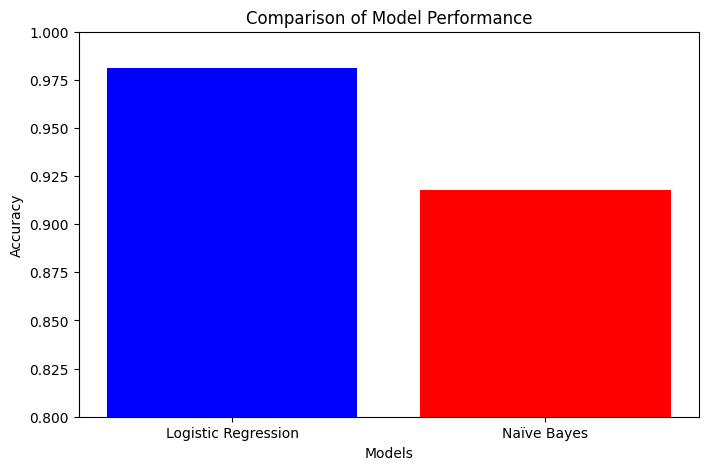

In [64]:
# Create a bar chart
plt.figure(figsize=(8,5))
plt.bar(models, accuracies, color=['blue', 'red'])
plt.ylim(0.8, 1)  # Adjust scale for better visualization
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Comparison of Model Performance")
plt.show()

Training Logistic Regression on One-Hot Encoded Data for Comparison

In [65]:
import numpy as np
import pandas as pd
import scipy.sparse
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [66]:
# Load One-Hot Encoded Data (Sparse Format)
sparse_matrix = scipy.sparse.load_npz("one_hot_encoded.npz")

In [67]:
# Load Labels
df = pd.read_csv("final_combined_dataset.csv")
y = df["label"]  # Extract labels

In [68]:
# Train-Test Split
X_train_onehot, X_test_onehot, y_train, y_test = train_test_split(sparse_matrix, y, test_size=0.2, random_state=77)

In [69]:
# Initialize and Train Logistic Regression
clf_onehot = LogisticRegression(max_iter=1000)
clf_onehot.fit(X_train_onehot, y_train)

LogisticRegression(max_iter=1000)

In [71]:
# Evaluate Performance
y_pred_onehot = clf_onehot.predict(X_test_onehot)
accuracy_onehot = accuracy_score(y_test, y_pred_onehot)

In [72]:
print(f"Logistic Regression Accuracy (One-Hot): {accuracy_onehot:.4f}")

Logistic Regression Accuracy (One-Hot): 0.9941


In [73]:
# Classification Report
print("\nClassification Report (One-Hot Encoding):\n", classification_report(y_test, y_pred_onehot))



Classification Report (One-Hot Encoding):
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1040
           1       0.99      1.00      0.99      1009

    accuracy                           0.99      2049
   macro avg       0.99      0.99      0.99      2049
weighted avg       0.99      0.99      0.99      2049



In [74]:
# Cross-Validation
cv_scores_onehot = cross_val_score(clf_onehot, X_train_onehot, y_train, cv=5)
print(f"\nCross-validation mean accuracy (One-Hot): {cv_scores_onehot.mean():.4f}")
print(f"Cross-validation accuracy per fold: {cv_scores_onehot}")


Cross-validation mean accuracy (One-Hot): 0.9941
Cross-validation accuracy per fold: [0.99450885 0.99145821 0.99328859 0.99816962 0.99328859]


Plotting Comaprison

In [ ]:
# Accuracy values 
accuracy_tfidf = 0.9810  # Test accuracy for TF-IDF
accuracy_onehot = 0.9941  # Test accuracy for One-Hot

cv_scores_tfidf = [0.9884, 0.9865, 0.9871, 0.9871, 0.9823]  # CV scores for TF-IDF
cv_scores_onehot = [0.9945, 0.9915, 0.9933, 0.9981, 0.9933]  # CV scores for One-Hot

cv_accuracy_tfidf = np.mean(cv_scores_tfidf)  # Compute mean cross-validation accuracy
cv_accuracy_onehot = np.mean(cv_scores_onehot)

In [94]:
# Labels and values
methods = ['TF-IDF', 'One-Hot']
test_accuracies = [accuracy_tfidf, accuracy_onehot]
cv_accuracies = [cv_accuracy_tfidf, cv_accuracy_onehot]

In [96]:
# Bar width
bar_width = 0.35
x = np.arange(len(methods))

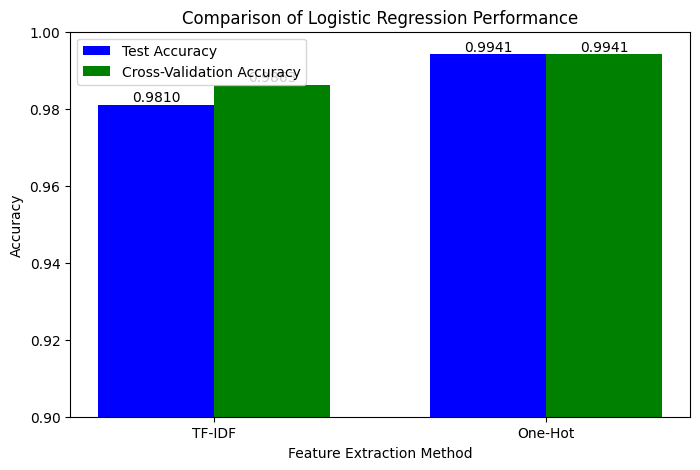

In [100]:
# Plot bar chart
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - bar_width/2, test_accuracies, bar_width, label='Test Accuracy', color='blue')
bars2 = ax.bar(x + bar_width/2, cv_accuracies, bar_width, label='Cross-Validation Accuracy', color='green')

# Labels and title
ax.set_xlabel("Feature Extraction Method")
ax.set_ylabel("Accuracy")
ax.set_title("Comparison of Logistic Regression Performance")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.legend()

# Display the values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height, f'{height:.4f}', ha='center', va='bottom')

# Show the plot
plt.ylim(0.9, 1.0)  # Adjust y-axis for better visualization
plt.show()

Extracting and Visualising Feature Importance for One Hot and TF-IDF

Finding the most influential features (words) in the dataset based on their importance in the Logistic Regression model

In [103]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_top_features(model, feature_names, title="Feature Importance", top_n=20):
    """Plots the most important features of a trained Logistic Regression model."""

    # Extract feature importance (absolute values of coefficients)
    feature_importance = np.abs(model.coef_).flatten()

    # Get indices of top N features
    top_indices = np.argsort(feature_importance)[-top_n:]

    # Select top features and their importance
    top_features = np.array(feature_names)[top_indices]
    top_importance = feature_importance[top_indices]

    # Plot feature importance
    plt.figure(figsize=(10, 5))
    sns.barplot(x=top_importance, y=top_features, palette="viridis")
    plt.xlabel("Coefficient Magnitude")
    plt.ylabel("Feature")
    plt.title(title)
    plt.show()

TF_IDF


<ipython-input-103-6abfc9e2fd04>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importance, y=top_features, palette="viridis")


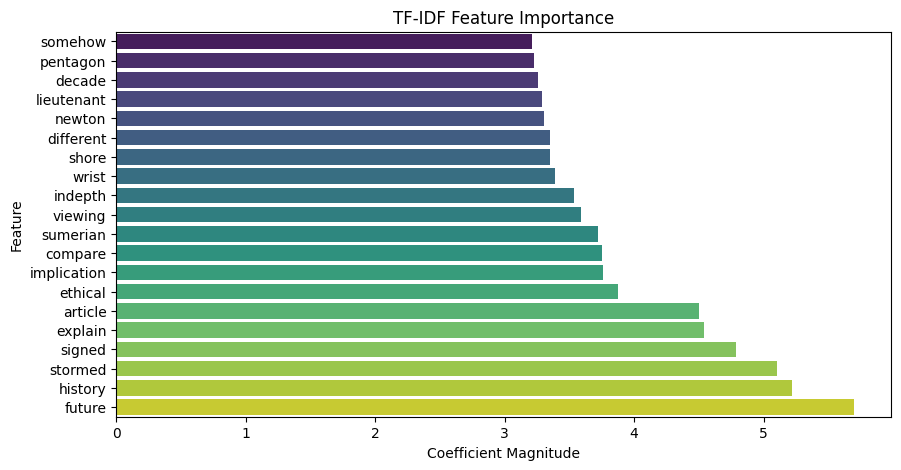

In [104]:
plot_top_features(clf, tfidf_vectorizer.get_feature_names_out(), title="TF-IDF Feature Importance")

ONE-HOT

<ipython-input-103-6abfc9e2fd04>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importance, y=top_features, palette="viridis")


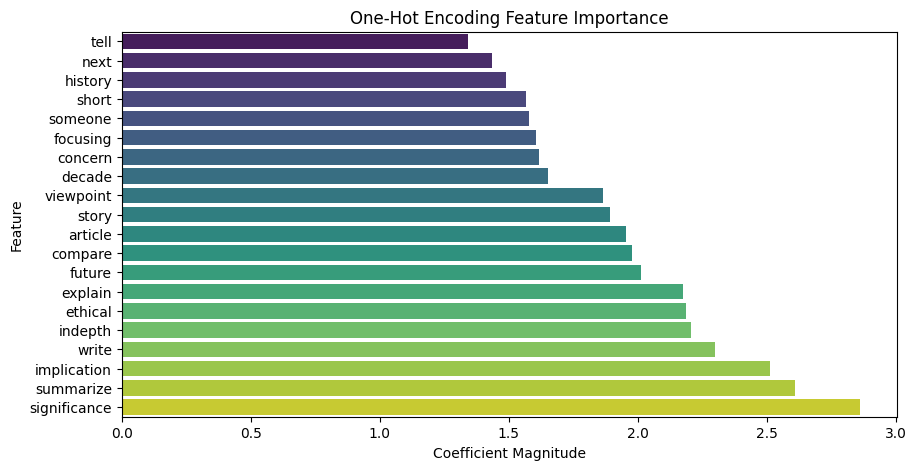

In [105]:
plot_top_features(clf_onehot, one_hot_vectorizer.get_feature_names_out(), title="One-Hot Encoding Feature Importance")
